In [17]:
import pandas as pd

In [21]:
import os
current_directory = os.getcwd()
print(current_directory)

/Users/dylan/專案實作


In [13]:
import glob
csv_files = glob.glob('Top_10_richest_person_in_the_world_*.csv')
for file_name in csv_files:
    year = file_name.split('_')[-1].split('.')[0]
    new_file_name = f'Top_10_richest_{year}.csv'
    os.rename(file_name, new_file_name)
    print(f'Renamed: {file_name} -> {new_file_name}')
print('所有檔案名已成功修改')

Renamed: Top_10_richest_person_in_the_world_2019.csv -> Top_10_richest_2019.csv
Renamed: Top_10_richest_person_in_the_world_2018.csv -> Top_10_richest_2018.csv
Renamed: Top_10_richest_person_in_the_world_2024.csv -> Top_10_richest_2024.csv
Renamed: Top_10_richest_person_in_the_world_2023.csv -> Top_10_richest_2023.csv
Renamed: Top_10_richest_person_in_the_world_2022.csv -> Top_10_richest_2022.csv
Renamed: Top_10_richest_person_in_the_world_2008.csv -> Top_10_richest_2008.csv
Renamed: Top_10_richest_person_in_the_world_2020.csv -> Top_10_richest_2020.csv
Renamed: Top_10_richest_person_in_the_world_2021.csv -> Top_10_richest_2021.csv
Renamed: Top_10_richest_person_in_the_world_2009.csv -> Top_10_richest_2009.csv
Renamed: Top_10_richest_person_in_the_world_1996.csv -> Top_10_richest_1996.csv
Renamed: Top_10_richest_person_in_the_world_1997.csv -> Top_10_richest_1997.csv
Renamed: Top_10_richest_person_in_the_world_1999.csv -> Top_10_richest_1999.csv
Renamed: Top_10_richest_person_in_the_wo

In [113]:
#因為上次合併檔案時，未發現原始檔案的排名是沒有'rank'的欄位，排序就只是該份檔案的排序
#所以尋求chatGPT，針對要合併檔案時依照他原始的排名創建'year'以及'rank'欄位
#並且將檔案依照這樣的方式做合併

In [25]:
folder_path = '/Users/dylan/專案實作'
files = glob.glob(os.path.join(folder_path, 'Top_10_richest_*.csv'))
df_list = []
for file in files:
    year = int(os.path.basename(file).split('_')[3].split('.')[0])
    df = pd.read_csv(file)
    df['year'] = year
    df['rank'] = df.index + 1
    df_list.append(df)
combined_df = pd.concat(df_list, ignore_index=True)
combined_df = combined_df.sort_values(by = ['year', 'rank']).reset_index(drop = True)
output_file_path = os.path.join(folder_path, 'combine_data_1996_2024.csv')
combined_df.to_csv(output_file_path, index = False)

In [115]:
#這段程式碼是因為發現原始資料中資產欄位'Net_worth_USD'是用'billion'
#故也是尋求chatGPT協助點醒我將所有資產轉成整數數據，方便我找中位數、平均數、最大/最小值

In [28]:
def convert_money_string(money_str):
    money_str = money_str.replace('$', '').replace(',', '').strip()
    if 'billion' in money_str:
        return int(float(money_str.replace('billion', '').strip()) * 1e9)
    elif 'million' in money_str:
        return int(float(money_str.replace('million', '').strip()) * 1e6)
    elif 'thousand' in money_str:
        return int(float(money_str.replace('thousand', '').strip()) * 1e3)
    else:
        return int(float(money_str))
combined_df['Net_worth_USD'] = combined_df['Net_worth_USD'].apply(convert_money_string)
combined_df.to_csv(output_file_path, index = False)

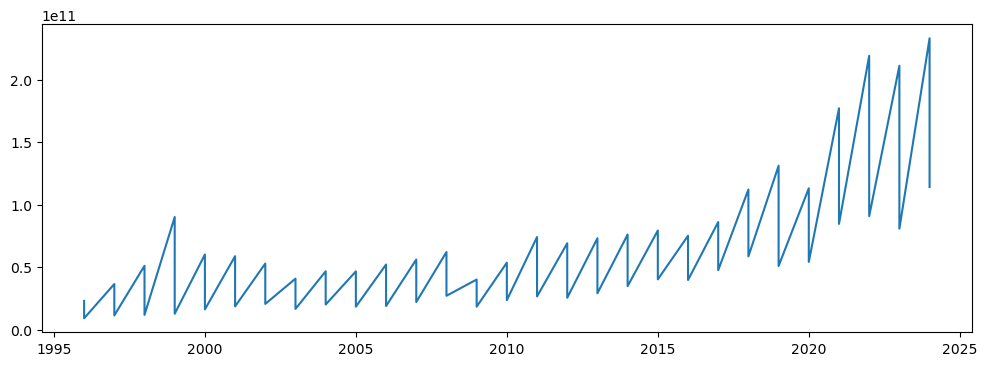

In [41]:
#以資產'Net_worth_USD'為y軸，以年份'year'為x軸畫出的折線圖
#但意識到這數據會是依照第一年的1-10名在換第二年的1-10名
import matplotlib.pyplot as plt
x = combined_df['year']
y = combined_df['Net_worth_USD']
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot()
ax.plot(x, y)
plt.show()

In [44]:
print(combined_df)

     Unnamed: 0                             Name  Net_worth_USD Age  \
0             0                    Walton family    22900000000   _   
1             1                       Bill Gates    18000000000  41   
2             2                   Warren Buffett    15300000000  65   
3             3  Oeri, Hoffman & Sacher families    13100000000   _   
4             4                     Lee Shau-kee    12700000000  68   
..          ...                              ...            ...  ..   
285           5                   Warren Buffett   133000000000  93   
286           6                       Bill Gates   128000000000  68   
287           7                    Steve Ballmer   121000000000  68   
288           8                    Mukesh Ambani   116000000000  65   
289           9                       Larry Page   114000000000  51   

       Nationality        Primary_source_of_wealth  year  rank  
0    United States                        Wal-Mart  1996     1  
1    United State

In [46]:
import numpy as np
print(f'數據大小: {combined_df.shape}')

數據大小: (290, 8)


In [118]:
#因此在這邊創建了'median', 'mean', 'max', 'min'四個欄位
#針對每十筆資料（也就是一個年份）統計中位數、平均數、最大/最小值
combined_df['Median'] = None
combined_df['Mean'] = None
combined_df['Max'] = None
combined_df['Min'] = None
for start in range(0, len(combined_df), 10):
    end = start + 10
    year_slice = combined_df[start : end]
    median = year_slice['Net_worth_USD'].median()
    mean = year_slice['Net_worth_USD'].mean()
    max_value = year_slice['Net_worth_USD'].max()
    min_value = year_slice['Net_worth_USD'].min()
    combined_df.loc[start : end, 'Median'] = median
    combined_df.loc[start : end, 'Mean'] = mean
    combined_df.loc[start : end, 'Max'] = max_value
    combined_df.loc[start : end, 'Min'] = min_value

In [55]:
output_file_path = '/Users/dylan/專案實作/data_new.csv'
combined_df.to_csv(output_file_path, index = False)

In [60]:
df1 = pd.read_csv('data_new.csv')
print(df1.columns)

Index(['Unnamed: 0', 'Name', 'Net_worth_USD', 'Age', 'Nationality',
       'Primary_source_of_wealth', 'year', 'rank', 'Median', 'Mean', 'Max',
       'Min'],
      dtype='object')


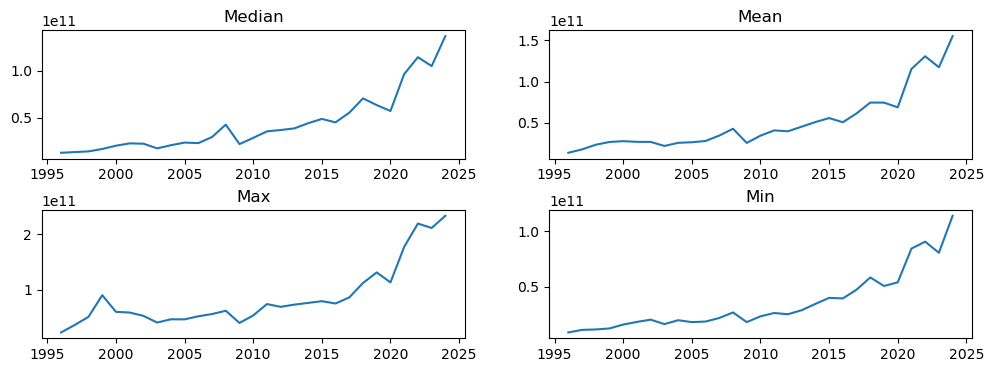

In [66]:
#年份為橫座標，資產為縱座標(平均數、中位數、最高值、最低值四條線）
x = df1['year']
y1 = df1['Median']
y2 = df1['Mean']
y3 = df1['Max']
y4 = df1['Min']
fig = plt.figure(figsize = (12, 4))
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(x, y1)
ax1.set_title('Median')
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(x, y2)
ax2.set_title('Mean')
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(x, y3)
ax3.set_title('Max')
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(x, y4)
ax4.set_title('Min')
fig.subplots_adjust(hspace = 0.4)
plt.show()

In [68]:
#計算國家次數，但這是每一年算一次
national_counts = df1['Nationality'].value_counts()
print(national_counts)

United States                        172
India                                 17
Mexico                                16
Germany                               15
France                                15
Spain                                 13
Hong Kong                             11
Saudi Arabia                           8
Sweden                                 6
Canada                                 4
South Africa Canada United States      4
Brazil                                 3
Taiwan                                 2
Japan                                  2
Switzerland                            1
Russia                                 1
Name: Nationality, dtype: int64


In [90]:
#每五年統計一次各個國家出現的次數
result_df = pd.DataFrame()
for start_year in range(1996, 2025, 5):
    end_year = start_year + 4
    #print(f"processing period : {start_year} to {end_year}")
    period_df = df1[(df1['year'] >= start_year) & (df1['year'] <= end_year)]
    #print(f"Number of records for this period : {len(period_df)}")
    country_counts = period_df['Nationality'].value_counts().reset_index()
    country_counts.columns = ['Nationality', 'Counts']
    country_counts['Period'] = f"{start_year} - {end_year}"
    result_df = pd.concat([result_df, country_counts], ignore_index=True)
print(result_df)

                          Nationality  Counts       Period
0                       United States      28  1996 - 2000
1                           Hong Kong       7  1996 - 2000
2                             Germany       5  1996 - 2000
3                        Saudi Arabia       3  1996 - 2000
4                              Taiwan       2  1996 - 2000
5                               Japan       2  1996 - 2000
6                              Canada       2  1996 - 2000
7                         Switzerland       1  1996 - 2000
8                       United States      38  2001 - 2005
9                             Germany       5  2001 - 2005
10                       Saudi Arabia       4  2001 - 2005
11                              India       1  2001 - 2005
12                             Mexico       1  2001 - 2005
13                             Sweden       1  2001 - 2005
14                      United States      14  2006 - 2010
15                              India      10  2006 - 20

/var/folders/p6/x7_d4t2n5js9vn2q3645ypgh0000gn/T/ipykernel_4063/3281961075.py:10: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  plt.tight_layout()
/var/folders/p6/x7_d4t2n5js9vn2q3645ypgh0000gn/T/ipykernel_4063/3281961075.py:10: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from current font.
  plt.tight_layout()
/var/folders/p6/x7_d4t2n5js9vn2q3645ypgh0000gn/T/ipykernel_4063/3281961075.py:10: UserWarning: Glyph 20308 (\N{CJK UNIFIED IDEOGRAPH-4F54}) missing from current font.
  plt.tight_layout()
/var/folders/p6/x7_d4t2n5js9vn2q3645ypgh0000gn/T/ipykernel_4063/3281961075.py:10: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  plt.tight_layout()
/Users/dylan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dylan/opt/anaconda3/lib/pyt

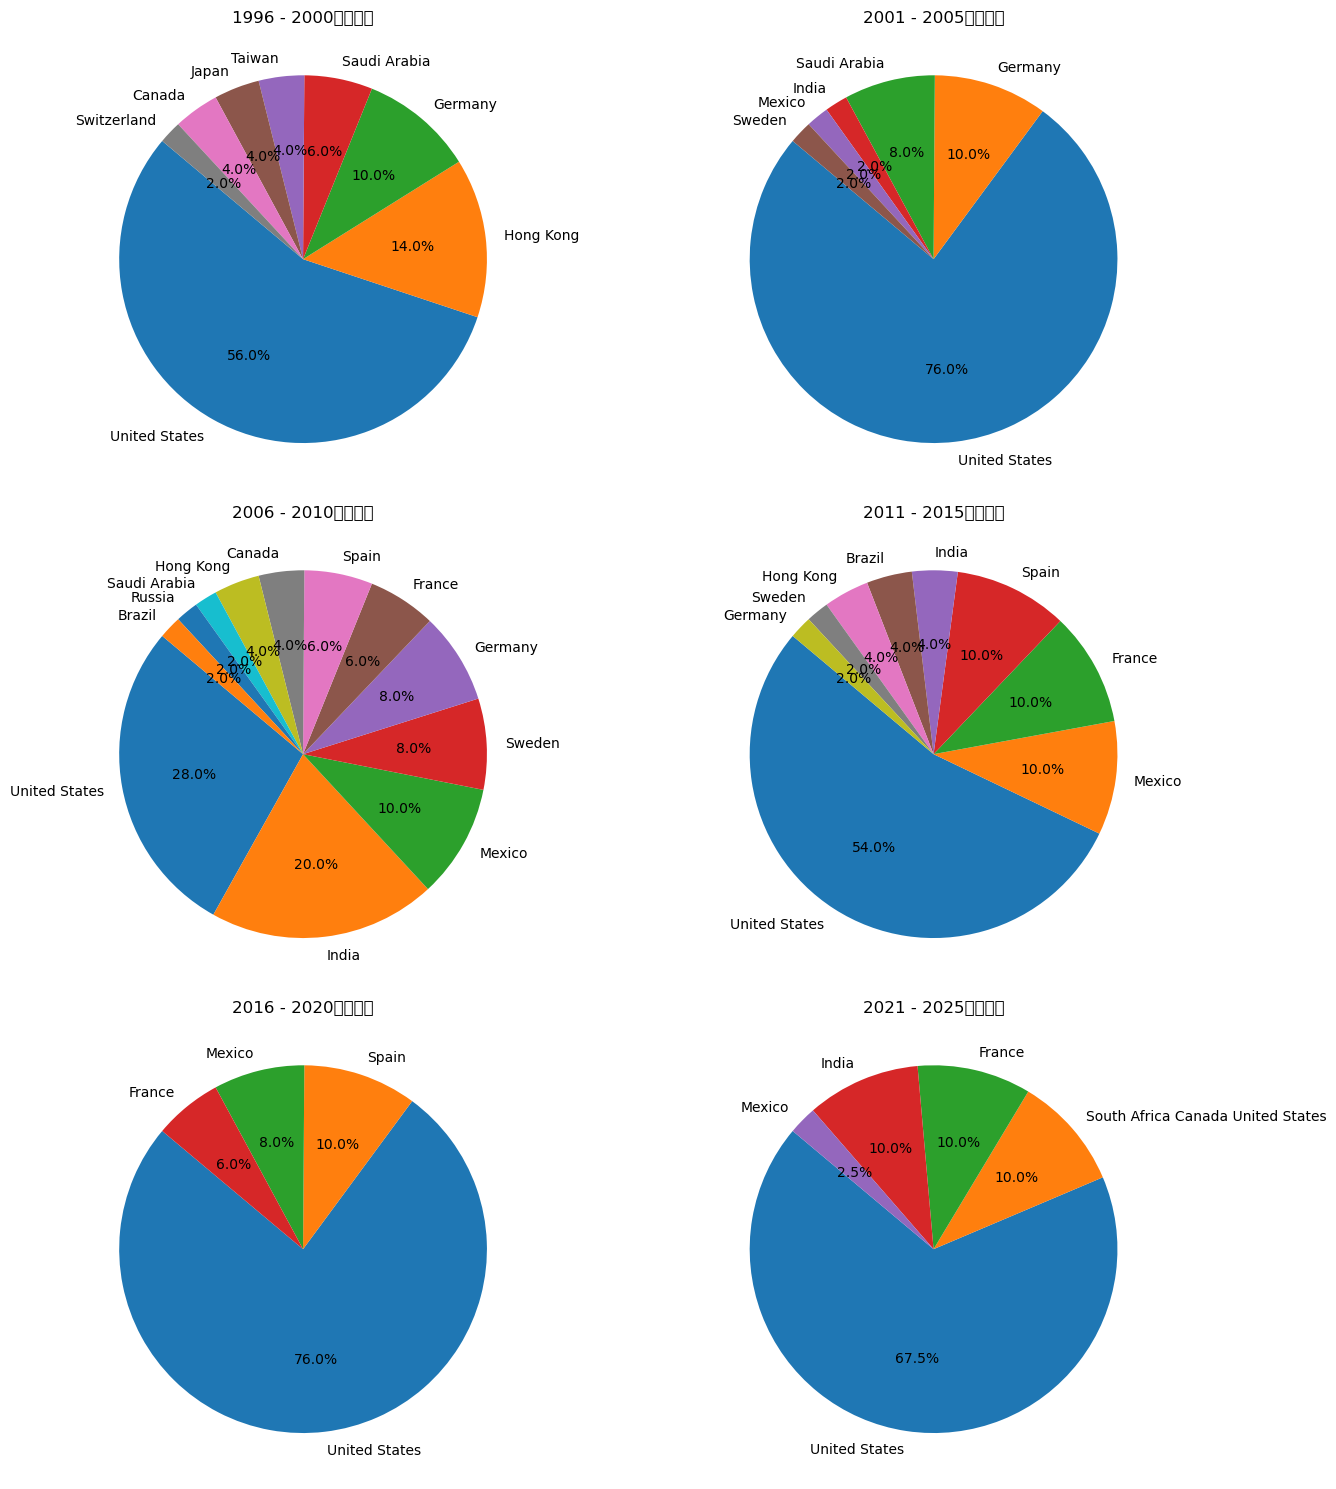

In [106]:
#從1996年到2024年，每五年統計一次繪製圓餅圖，觀察各國佔比
periods = result_df['Period'].unique()
fig, axs = plt.subplots(3, 2, figsize = (15, 15))
axs = axs.flatten()
for i, period in enumerate(periods):
    ax = axs[i]
    period_data = result_df[result_df['Period'] == period]
    ax.pie(period_data['Counts'], labels = period_data['Nationality'], autopct = '%1.1f%%', startangle = 140)
    ax.set_title(f"{period}各國佔比")
plt.tight_layout()
plt.show()

In [108]:
print(df1.columns)

Index(['Unnamed: 0', 'Name', 'Net_worth_USD', 'Age', 'Nationality',
       'Primary_source_of_wealth', 'year', 'rank', 'Median', 'Mean', 'Max',
       'Min'],
      dtype='object')


In [110]:
#計算私人資產來源次數
Primary_source_counts = df1['Primary_source_of_wealth'].value_counts()
print(Primary_source_counts)

Microsoft                                  43
Berkshire Hathaway                         29
Wal-Mart                                   23
Oracle Corporation                         21
América Móvil, Grupo Carso                 15
Koch Industries                            12
Walmart                                     9
LVMH                                        9
Amazon                                      9
Kingdom Holding Company                     8
Aldi                                        8
Reliance Industries                         8
Inditex Group                               6
Google                                      6
Aldi Süd                                    5
IKEA                                        5
Arcelor Mittal                              5
Facebook, Inc.                              5
LVMH Moët Hennessy • Louis Vuitton          4
Bloomberg L.P.                              4
Inditex, Zara                               4
Inditex                           

In [ ]:
#觀察從1996年到2024年，私人資產來源的變化趨勢